In [28]:
#################################################
#  Company    : Stevens Institute of Technology
#  Project    : HW03
#  Purpose    : To perform the classification model given the random forest methodology given the database called breast-cancer-wisconsin.data.csv
#  First Name : Spruha
#  Last Name  : Paradkar
#  Id		  : 10470967
#  Date       : 11/27/2023
#  Comments   : I pledge my honor that I have abided by the Stevens Honor System
#################################################

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [30]:
print('Loading the breast cancer dataset')
breastCancer = pd.read_csv('/Users/spruhap/Downloads/breast-cancer-wisconsin.csv')
breastCancer.head(10)

Loading the breast cancer dataset


,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [31]:
print('The length of the database before dropping all the missing values')
print(len(breastCancer))

The length of the database before dropping all the missing values
699


In [32]:
breastCancer = breastCancer.drop(breastCancer.loc[breastCancer['F6']== '?'].index)
print('The length of the database after dropping all the missing values')
print(len(breastCancer))

The length of the database after dropping all the missing values
683


In [33]:
print('Dropping the Class field')
# Splitting the dataset
attributes = breastCancer.drop(columns = ['Class', 'Sample'])
attributes.head(10)

Dropping the Class field


,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [34]:
print('Creating a data frame called target for the Class variable')
target = breastCancer['Class'] # target variable
target.head(10)

Creating a data frame called target for the Class variable


0    2
1    2
2    2
3    2
4    2
5    4
6    2
7    2
8    2
9    2
Name: Class, dtype: int64

In [35]:
#RANDOM_STATE helps to keep the data consistent -> it keeps the values consistent when you run the code again
print('Dividing the data into test and train data given the 30/70 split ratio')
attribute_train, attribute_test, target_train,target_test  = train_test_split(attributes, target,test_size = 0.3, random_state = 87, shuffle = True)

Dividing the data into test and train data given the 30/70 split ratio


In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=8)

In [37]:
model.fit(attribute_train,target_train)
target_pred = model.predict(attribute_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

Accuracy= 0.9560975609756097
[[125   2]
 [  7  71]]
              precision    recall  f1-score   support

           2       0.95      0.98      0.97       127
           4       0.97      0.91      0.94        78

    accuracy                           0.96       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [39]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

Mean Decrease Accuracy[0.04046434 0.311089   0.17276195 0.03431987 0.07203579 0.16871576
 0.08947418 0.10209621 0.0090429 ]

Mean Decrease GINI= [0.01755124 0.13493358 0.07493479 0.0148861  0.03124523 0.07317977
 0.03880906 0.04428381 0.00392232]


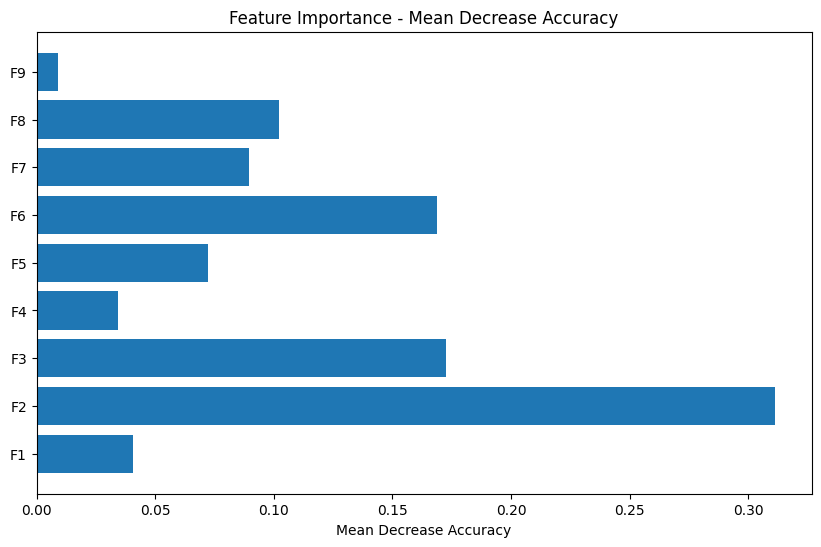

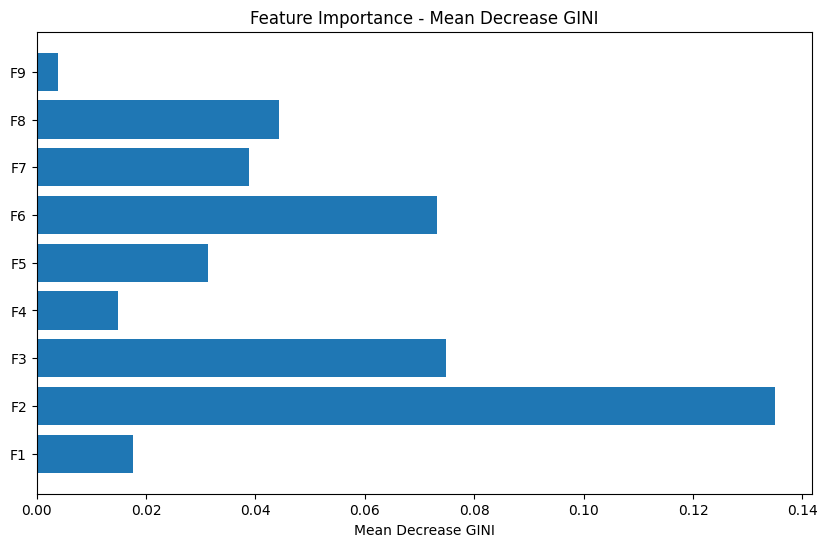

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attributes.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attributes.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [41]:
feature_scores = pd.Series(model.feature_importances_, index=attribute_train.columns).sort_values(ascending=False)
print(feature_scores)

F2    0.311089
F3    0.172762
F6    0.168716
F8    0.102096
F7    0.089474
F5    0.072036
F1    0.040464
F4    0.034320
F9    0.009043
dtype: float64
